
<center><h2>The mission statement</h2></center> 

<center><h4>  

Bellabeat's main focus is to analyze smart devices fitness data and determine how it could help unlock new growth opportunities for the company. We will focus on one of Bellabeat’s products: Bellabeat app.</h4></center> 

# 1 Ask Phase 

### 1.1 Business Task <a class="anchor" id="business_task_2_1"></a> 

Identify trends in how consumers use non-Bellabeat smart devices to apply insights into Bellabeat’s marketing strategy. 

Stakeholders 

* Urška Sršen - Bellabeat cofounder and Chief Creative Officer 
* Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team 
* Bellabeat Marketing Analytics team 

# 2. Prepare Phase 
### Key objectives:

**1.Determine the credibility of the data:**

* These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.


* Due to the limitation of sample size and not having any demographic information we could encounter a sampling bias. We are not sure if the sample is representative of the population as a whole. Another problem we would encounter is that the dataset is not current and also the time limitation of the survey. That is why we will give our case study an operational approach.





# 3. Process Phase 
 
I will focus my analysis in Python, amount of data and to be able to create data visualization to share my results with stakeholders. 

### 3.1 Installing packages and opening libraries

We will choose the packages that will help us on our analysis and open them. 
We will use the following packages for our analysis: 


In [43]:
#First I add all the libraries necessary to my analysis
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
FIG_SIZE=(10, 5)

### 3.2 Importing datasets <a class="anchor" id="importing_datasets_4_2"></a>

Knowing the datasets we have, we will upload the datasets that will help us answer our business task. 
On our analysis we will focus on the following datasets: 
 
 * Daily_activity 
 * Daily_sleep 
 * Hourly_steps
 
Due to the the small sample we won't consider for this analysis Weight (8 Users) and heart rate (7 users)

In [2]:
daily_activity_df = pd.read_csv("Fitabase_Data/dailyActivity_merged.csv")
daily_sleep_df = pd.read_csv("Fitabase_Data/sleepDay_merged.csv")
hourly_steps_df = pd.read_csv("Fitabase_Data/hourlySteps_merged.csv")

### 3.3 Preview our datasets <a class="anchor" id="preview_our_datasets_4_3"></a>
 
 We will preview our selected data frames and check the summary of each column. 

In [3]:
print(daily_activity_df.head())
print(daily_activity_df.info())

print(daily_sleep_df.head())
print(daily_sleep_df.info())

print(hourly_steps_df.head())
print(hourly_steps_df.info())



           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

### 3.4 Cleaning and formatting <a class="anchor" id="cleaning_and_formatting_4_4"></a>

Now that we got to know more about our data structures we will process them to look for any errors and inconsistencies. 

#### 3.4.1 Veryfying number of users

Before we continue with our cleaning we want to make sure how many unique users are per data frame. 
Even though 30 is the minimal  sample size we will still keep the sleep dataset for practice only. 


In [4]:
print(daily_activity_df['Id'].unique().size)
print(daily_sleep_df['Id'].unique().size)
print(hourly_steps_df['Id'].unique().size)

33
24
33


#### 3.4.2 Duplicates

We will now look for any duplicates:

In [5]:
print(daily_activity_df.duplicated().sum())
print(daily_sleep_df.duplicated().sum())
print(hourly_steps_df.duplicated().sum())

0
3
0


#### 3.4.3 Remove duplicates and N/A

Knowing the length of our observations (daily_sleep 413) we are able to delete duplicates for daily_sleep. 

In [6]:
# Remove duplicated rows and drop rows with missing values in daily_activity
daily_activity_df = daily_activity_df.drop_duplicates().dropna()

# Remove duplicated rows and drop rows with missing values in daily_sleep
daily_sleep_df = daily_sleep_df.drop_duplicates().dropna()

# Remove duplicated rows and drop rows with missing values in hourly_steps
hourly_steps_df = hourly_steps_df.drop_duplicates().dropna()


We will verify that duplicates have been removed

In [7]:
print(daily_sleep_df.duplicated().sum())

0


#### 3.4.4 Clean and rename columns 

We want to ensure that column names are using right syntax and same format in all datasets since we will merge them later on. We are changing the format of all columns to lower case. 

clean_names(daily_activity)
daily_activity<- rename_with(daily_activity, tolower)
clean_names(daily_sleep)
daily_sleep <- rename_with(daily_sleep, tolower)
hourly_steps <- rename_with(hourly_steps, tolower)

#### 3.4.5 Consistency of date and time columns

Now that we have verified our column names and change them to lower case, we will focus on cleaning date-time format for daily_activity and daily_sleep since we will merge both data frames. Since we can disregard the time on daily_sleep data frame we are using as_date instead as as_datetime

In [8]:
# Rename column and convert to date format in daily_activity
daily_activity_df = daily_activity_df.rename(columns={'ActivityDate': 'Date'})
daily_activity_df['Date'] = pd.to_datetime(daily_activity_df['Date'], format="%m/%d/%Y")
daily_activity_df

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [9]:
# Rename column and convert to date format in daily_sleep
daily_sleep_df = daily_sleep_df.rename(columns={'SleepDay': 'Date'})
daily_sleep_df['Date'] = pd.to_datetime(daily_sleep_df['Date'], format="%m/%d/%Y %I:%M:%S %p")
daily_sleep_df.head()

,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


For our hourly_steps dataset we will convert date string to date-time.

In [10]:
# Rename column and convert to datetime format in hourly_steps
hourly_steps_df = hourly_steps_df.rename(columns={'ActivityHour': 'Datetime'})
hourly_steps_df['Datetime'] = pd.to_datetime(hourly_steps_df['Datetime'], format="%m/%d/%Y %I:%M:%S %p")
hourly_steps_df.head()

,Id,Datetime,StepTotal
0,1503960366,2016-04-12 00:00:00,373
1,1503960366,2016-04-12 01:00:00,160
2,1503960366,2016-04-12 02:00:00,151
3,1503960366,2016-04-12 03:00:00,0
4,1503960366,2016-04-12 04:00:00,0


### 3.5 Merging Datasets <a class="anchor" id="merging_datasets_4_5"></a>

We will merge daily_activity and daily_sleep to see any correlation between variables by using id and date as their primary keys.  


In [11]:
# Merge daily_activity and daily_sleep on columns 'id' and 'date'
daily_activity_sleep_df = pd.merge(daily_activity_df, daily_sleep_df, on=['Id', 'Date'])
daily_activity_sleep_df

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,8792009665,2016-04-30,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,1,343,360
406,8792009665,2016-05-01,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962,1,503,527
407,8792009665,2016-05-02,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015,1,415,423
408,8792009665,2016-05-03,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297,1,516,545


# 4. Analyze Phase and Share Phase 

We will analyze trends of the users of FitBit and determine if that can help us on BellaBeat's marketing strategy. 

### 4.1 Type of users per activity level 

Since we don't have any demographic variables from our sample we want to determine the type of users with the data we have. We can classify the users by activity considering the daily amount of steps. We can categorize users as follows:

* Sedentary - Less than 5000 steps a day.
* Lightly active - Between  5000 and 7499 steps a day. 
* Fairly active - Between 7500 and 9999 steps a day.
* Very active - More than 10000 steps a day. 

Classification has been made per the following article <https://www.10000steps.org.au/articles/counting-steps/>

First we will calculate the daily steps average by user.  

In [12]:
# Calculate daily averages for steps, calories, and sleep by grouping on 'id'
daily_average = daily_activity_sleep_df.groupby('Id').agg(
    mean_daily_steps=('TotalSteps', 'mean'),
    mean_daily_calories=('Calories', 'mean'),
    mean_daily_sleep=('TotalMinutesAsleep', 'mean')
).reset_index()

# Display the first few rows of daily_average
daily_average.head()


,Id,mean_daily_steps,mean_daily_calories,mean_daily_sleep
0,1503960366,12405.680000,1872.280000,360.280000
1,1644430081,7967.750000,2977.750000,294.000000
2,1844505072,3477.000000,1676.333333,652.000000
3,1927972279,1490.000000,2316.200000,417.000000
4,2026352035,5618.678571,1540.785714,506.178571


In [41]:
average_steps = daily_activity_sleep_df['TotalSteps'].mean()
print("Average steps:", average_steps)

Average steps: 8514.90975609756


We will now classify our users by the daily average steps. 

In [13]:
# Define a function to assign user type based on mean daily steps
def assign_user_type(steps):
    if steps < 5000:
        return 'sedentary'
    elif steps < 7500:
        return 'lightly active'
    elif steps < 10000:
        return 'fairly active'
    else:
        return 'very active'

# Apply the function to create a new 'user_type' column in daily_average
daily_average['user_type'] = daily_average['mean_daily_steps'].apply(assign_user_type)
daily_average


,Id,mean_daily_steps,mean_daily_calories,mean_daily_sleep,user_type
0,1503960366,12405.680000,1872.280000,360.280000,very active
1,1644430081,7967.750000,2977.750000,294.000000,fairly active
2,1844505072,3477.000000,1676.333333,652.000000,sedentary
3,1927972279,1490.000000,2316.200000,417.000000,sedentary
4,2026352035,5618.678571,1540.785714,506.178571,lightly active
5,2320127002,5079.000000,1804.000000,61.000000,lightly active
6,2347167796,8533.200000,1971.333333,446.800000,fairly active
7,3977333714,11218.000000,1560.392857,293.642857,very active
8,4020332650,6596.750000,3195.000000,349.375000,lightly active
9,4319703577,7125.423077,2024.692308,476.653846,lightly active


Now that we have a new column with the user type we will create a data frame with the percentage of each user type to better visualize them on a graph. 

In [14]:
# Calculate the total count for each user_type
user_type_df = daily_average['user_type'].value_counts().reset_index()
user_type_df.columns = ['user_type', 'count']

# Calculate the total count of all user types
total_count = user_type_df['count'].sum()

# Calculate the percentage of each user_type
user_type_df['percent'] = user_type_df['count']/total_count

# Format the total_percent column as labels
user_type_df['percent'] = (user_type_df['percent'] * 100)

# Set the user_type column as a factor with specified order
user_type_df['user_type'] = pd.Categorical(user_type_df['user_type'], 
                                               categories=['very active', 'fairly active', 'lightly active', 'sedentary'],
                                               ordered=True)
user_type_df = user_type_df.sort_values('user_type')

# Display the first few rows of user_type_percent
user_type_df


,user_type,count,percent
1,very active,5,20.833333
0,fairly active,9,37.500000
3,lightly active,5,20.833333
2,sedentary,5,20.833333


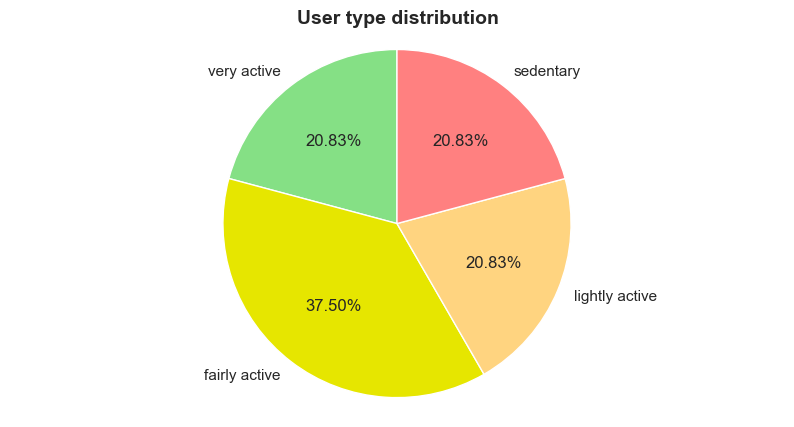

In [15]:
# Set up the pie chart
fig, ax = plt.subplots(figsize=FIG_SIZE)

# Plot the pie chart
ax.pie(user_type_df['percent'], labels=user_type_df['user_type'], 
       colors=['#85e085', '#e6e600', '#ffd480', '#ff8080'], autopct='%0.2f%%', startangle=90)

# Set the aspect ratio to be equal so that the pie is circular
ax.axis('equal')

# Set plot title
plt.title('User type distribution', fontweight='bold', size=14)

# Show the pie chart
plt.show()


We can see that users are fairly distributed by their activity considering the daily amount of steps. **We can determine that based on users activity all kind of users wear smart-devices**. 

### 4.2 Steps and minutes asleep per weekday

We want to know now what days of the week are the users more active and also what days of the week users sleep more. We will also verify if the users walk the recommended amount of steps and have the recommended amount of sleep. 

Below we are calculating the weekdays based on our column date. We are also calculating the average steps walked and minutes sleeped by weekday. 

In [16]:
# Add 'weekday' column to daily_activity_sleep
daily_activity_sleep_df['Weekday'] = daily_activity_sleep_df['Date'].dt.strftime('%A')

# Define the desired order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'weekday' column to ordered categorical type
daily_activity_sleep_df['Weekday'] = pd.Categorical(daily_activity_sleep_df['Weekday'], categories=weekday_order, ordered=True)
daily_activity_sleep_df = daily_activity_sleep_df.sort_values('Weekday')

# Calculate mean daily steps and sleep by weekday
weekday_steps_sleep_df = daily_activity_sleep_df.groupby('Weekday').agg(
    DailySteps=('TotalSteps', 'mean'),
    DailySleep=('TotalMinutesAsleep', 'mean')
).reset_index()

# Display the first few rows of weekday_steps_sleep
weekday_steps_sleep_df


,Weekday,DailySteps,DailySleep
0,Monday,9273.217391,419.500000
1,Tuesday,9182.692308,404.538462
2,Wednesday,8022.863636,434.681818
3,Thursday,8183.515625,401.296875
4,Friday,7901.403509,405.421053
5,Saturday,9871.122807,419.070175
6,Sunday,7297.854545,452.745455


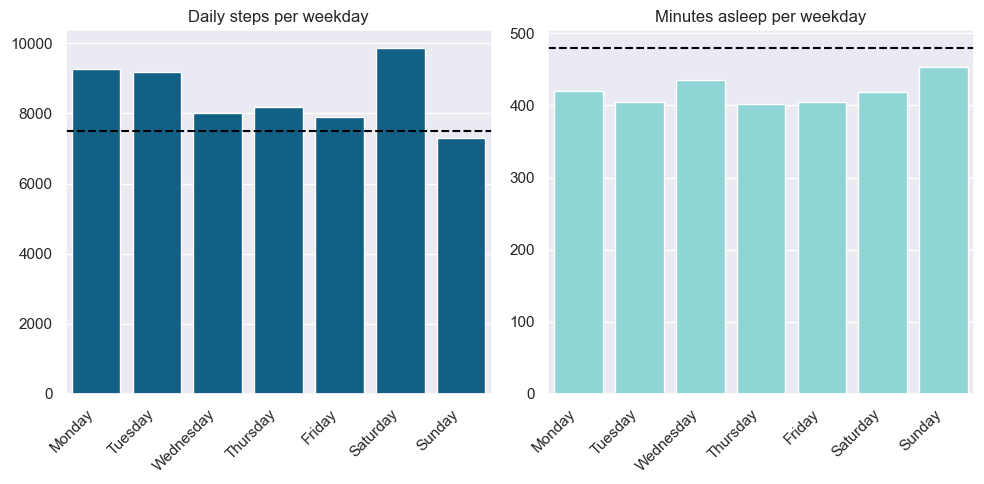

In [17]:
# Create two subplots for daily steps and minutes asleep per weekday
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=FIG_SIZE)

# Plot daily steps per weekday
sns.barplot(x='Weekday', y='DailySteps', data=weekday_steps_sleep_df, ax=ax1, color='#006699')
ax1.axhline(y=7500, color='black', linestyle='--')
ax1.set_title('Daily steps per weekday')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticklabels(weekday_steps_sleep_df['Weekday'], rotation=45, ha='right')

# Plot minutes asleep per weekday
sns.barplot(x='Weekday', y='DailySleep', data=weekday_steps_sleep_df, ax=ax2, color='#85e0e0')
ax2.axhline(y=480, color='black', linestyle='--')
ax2.set_title('Minutes asleep per weekday')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticklabels(weekday_steps_sleep_df['Weekday'], rotation=45, ha='right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In the graphs above we can determine the following: 

* Users walk daily the recommended amount of steps of 7500 besides Sunday's. 

* Users don't sleep the recommended amount of minutes/ hours - 8 hours. 

### 4.3 Hourly steps throughout the day <a class="anchor" id="hourly_steps_throughout_the_day"></a>

Getting deeper into our analysis we want to know when exactly are users more active in a day.

We will use the hourly_steps data frame and separate date_time column.

In [18]:
hourly_steps_df['Date'] = hourly_steps_df['Datetime'].dt.date
hourly_steps_df['Time'] = hourly_steps_df['Datetime'].dt.time
hourly_steps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Id         22099 non-null  int64         
 1   Datetime   22099 non-null  datetime64[ns]
 2   StepTotal  22099 non-null  int64         
 3   Date       22099 non-null  object        
 4   Time       22099 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.0+ MB


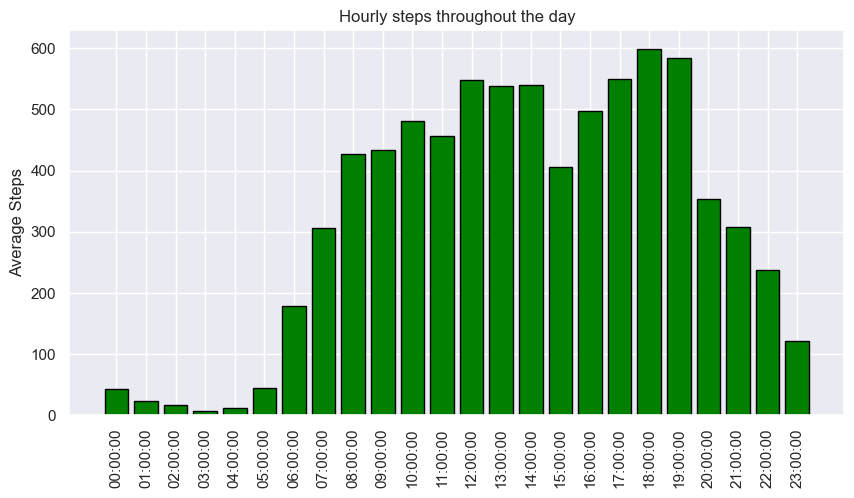

In [19]:
# Group by 'time' and calculate average steps
hourly_average_steps = hourly_steps_df.groupby('Time')['StepTotal'].mean().reset_index()
hourly_average_steps['Time'] = hourly_average_steps['Time'].astype(str)

# Create the bar plot
plt.figure(figsize=FIG_SIZE)
plt.bar(hourly_average_steps['Time'], hourly_average_steps['StepTotal'], color='green', edgecolor='black')

plt.title('Hourly steps throughout the day')
plt.xlabel('')
plt.ylabel('Average Steps')
plt.xticks(rotation=90)

# Show the plot
plt.show()


We can see that users are more active between 8am and 7pm. Walking more steps during lunch time from 12pm to 2pm and evenings from 5pm and 7pm. 


### 4.4 Correlations <a class="anchor" id="correlations"></a>

We will now determine if there is any correlation between different variables: 

* Daily steps and daily sleep
* Daily steps and calories 


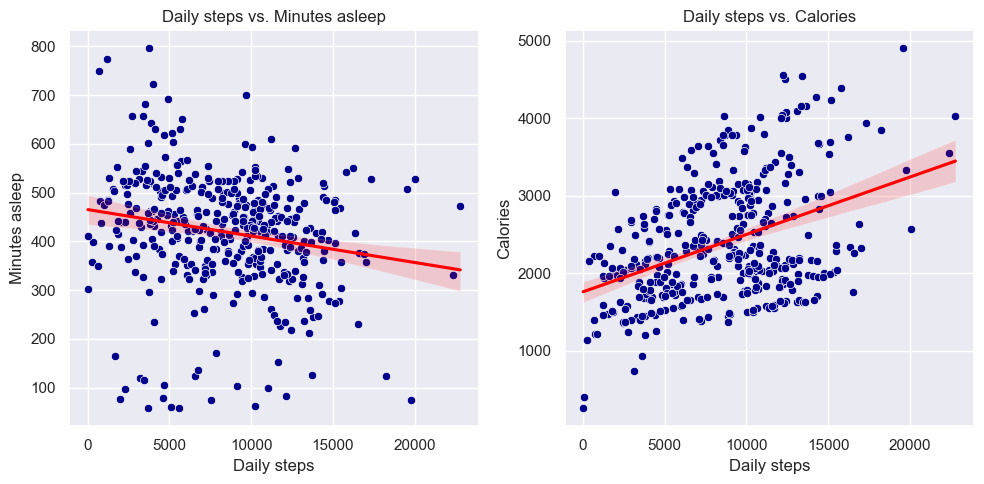

In [39]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=FIG_SIZE)

# Plot 1: Daily steps vs. Minutes asleep
sns.scatterplot(data=daily_activity_sleep_df, x='TotalSteps', y='TotalMinutesAsleep', color='darkblue', ax=axs[0])
sns.regplot(data=daily_activity_sleep_df, x='TotalSteps', y='TotalMinutesAsleep', scatter=False, color='red', ax=axs[0])
axs[0].set_title('Daily steps vs. Minutes asleep')
axs[0].set_xlabel('Daily steps')
axs[0].set_ylabel('Minutes asleep')

# Plot 2: Daily steps vs. Calories
sns.scatterplot(data=daily_activity_sleep_df, x='TotalSteps', y='Calories', color='darkblue', ax=axs[1])
sns.regplot(data=daily_activity_sleep_df, x='TotalSteps', y='Calories', scatter=False, color='red', ax=axs[1])
axs[1].set_title('Daily steps vs. Calories')
axs[1].set_xlabel('Daily steps')
axs[1].set_ylabel('Calories')

# Adjust layout and spacing
plt.tight_layout()

# Display the plots
plt.show()


Per our plots: 

* There is no correlation between daily activity level based on steps and the amount of minutes users sleep a day. 

* Otherwise we can see a positive correlation between steps and calories burned. As assumed the more steps walked the more calories may be burned. 


### 4.5 Use of smart device <a class="anchor" id="use_of_smart_device"></a> 

#### 4.5.1 Days used smart device <a class="anchor" id="days_used_smart_device"></a>

Now that we have seen some trends in activity, sleep and calories burned, we want to see how often do the users in our sample use their device. That way we can plan our marketing strategy and see what features would benefit the use of smart devices. 

We will calculate the number of users that use their smart device on a daily basis, classifying our sample into three categories knowing that the date interval is 31 days: 

* high use - users who use their device between 21 and 31 days. 
* moderate use - users who use their device between 10 and 20 days. 
* low use - users who use their device between 1 and 10 days. 

First we will create a new data frame grouping by Id, calculating number of days used and creating a new column with the classification explained above.

In [21]:
# Group by 'id' and calculate the total number of days used
daily_use = daily_activity_sleep_df.groupby('Id').agg(DaysUsed=('Date', 'count')).reset_index()

# Define a function to assign user type based on mean daily use
def assign_daily_use(days):
    if days < 10:
        return 'low use'
    elif days < 20:
        return 'moderate use'
    else:
        return 'high use'

# Apply the function to create a new 'user_type' column in daily_average
daily_use['MonthUsage'] = daily_use['DaysUsed'].apply(assign_daily_use)
daily_use


,Id,DaysUsed,MonthUsage
0,1503960366,25,high use
1,1644430081,4,low use
2,1844505072,3,low use
3,1927972279,5,low use
4,2026352035,28,high use
5,2320127002,1,low use
6,2347167796,15,moderate use
7,3977333714,28,high use
8,4020332650,8,low use
9,4319703577,26,high use


We will now create a percentage data frame to better visualize the results in the graph. We are also ordering our usage levels. 

In [22]:
# Calculate the total count for each user_type

usage_type = daily_use.groupby('MonthUsage').agg(count=('MonthUsage', 'count')).reset_index()

# Calculate the total count of all user types
total_usage_count = usage_type['count'].sum()

# # Calculate the percentage of each user_type
usage_type['percent'] = usage_type['count']/total_count*100
usage_type

,MonthUsage,count,percent
0,high use,12,50.0
1,low use,9,37.5
2,moderate use,3,12.5


Now that we have our new table we can create our plot: 

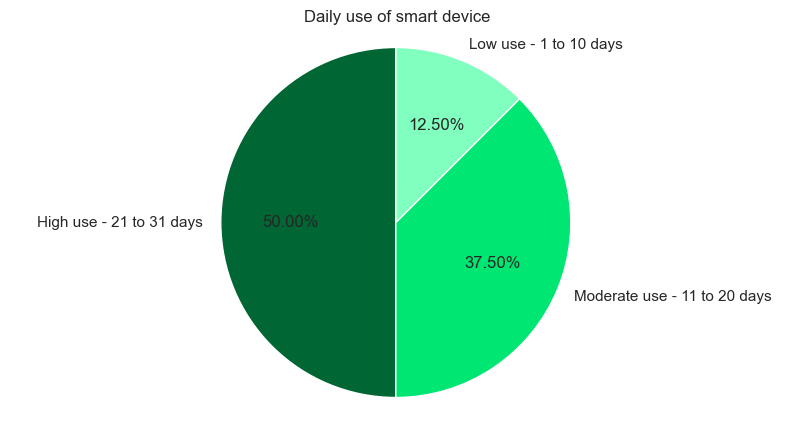

In [23]:
# Set up the data for the plot
usage_labels = ["High use - 21 to 31 days", "Moderate use - 11 to 20 days", "Low use - 1 to 10 days"]
usage_colors = ["#006633", "#00e673", "#80ffbf"]

# Create the pie chart
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.pie(usage_type['percent'], labels=usage_labels, colors=usage_colors, autopct='%0.2f%%', startangle=90)

# Add a title and remove unnecessary elements
plt.title("Daily use of smart device")
ax.axis('equal')

# Display the plot
plt.show()

Analyzing our results we can see that 

* 50% of the users of our sample use their device frequently - between 21 to 31 days. 
* 12.5% use their device 11 to 20 days. 
* 37.5% of our sample use really rarely their device. 

#### 4.5.2 Time used smart device <a class="anchor" id="time_used_smart_device"></a>

Being more precise we want to see how many minutes do users wear their device per day. 
For that we will merge the created daily_use data frame and daily_activity to be able to filter results by daily use of device as well. 

In [24]:
daily_activity_sleep_use = pd.merge(daily_activity_sleep_df, daily_use, on=['Id'])
daily_activity_sleep_use

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Weekday,DaysUsed,MonthUsage
0,4388161847,2016-05-02,10096,8.40,8.40,0.0,3.77,0.08,4.55,0.0,...,4,204,935,3147,2,368,376,Monday,23,high use
1,4388161847,2016-05-09,10218,7.86,7.86,0.0,0.34,0.73,6.79,0.0,...,19,258,1020,3013,1,62,65,Monday,23,high use
2,4388161847,2016-04-18,11009,9.10,9.10,0.0,3.56,0.40,5.14,0.0,...,8,239,1017,3274,1,99,104,Monday,23,high use
3,4388161847,2016-05-10,10299,7.92,7.92,0.0,0.81,0.65,6.46,0.0,...,14,267,648,3061,1,354,375,Tuesday,23,high use
4,4388161847,2016-04-19,10181,7.83,7.83,0.0,1.37,0.69,5.77,0.0,...,16,249,704,3015,1,329,338,Tuesday,23,high use
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,1844505072,2016-04-30,4014,2.67,2.67,0.0,0.00,0.00,2.65,0.0,...,0,184,218,1763,1,722,961,Saturday,3,low use
406,1844505072,2016-05-01,2573,1.70,1.70,0.0,0.00,0.26,1.45,0.0,...,7,75,585,1541,1,590,961,Sunday,3,low use
407,7007744171,2016-04-16,4631,3.10,3.10,0.0,0.00,0.00,3.10,0.0,...,0,203,1155,2076,1,79,82,Saturday,2,low use
408,7007744171,2016-05-01,5600,3.75,3.75,0.0,0.00,0.00,3.75,0.0,...,0,237,1142,2225,1,58,61,Sunday,2,low use


We need to create a new data frame calculating the total amount of minutes users wore the device every day and creating three different categories: 

* All day - device was worn all day. 
* More than half day - device was worn more than half of the day. 
* Less than half day - device was worn less than half of the day. 

In [25]:
# Calculate total minutes worn
daily_activity_sleep_use['TotalActiveMinutes'] = daily_activity_sleep_use['VeryActiveMinutes'] + daily_activity_sleep_use['FairlyActiveMinutes'] + daily_activity_sleep_use['LightlyActiveMinutes'] + daily_activity_sleep_use['SedentaryMinutes']

# Calculate percentage of minutes worn
daily_activity_sleep_use['PercentActive'] = daily_activity_sleep_use['TotalActiveMinutes'] / (24*60) * 100

# Define a function to assign user type based on mean daily use
def assign_minu_use(percent):
    if percent < 50:
        return 'less than half day'
    elif percent < 100:
        return 'more than half day'
    else:
        return 'all day'

# Apply the function to create a new 'user_type' column in daily_average
daily_activity_sleep_use['DailyWorn'] = daily_activity_sleep_use['PercentActive'].apply(assign_minu_use)

daily_activity_sleep_use


,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Weekday,DaysUsed,MonthUsage,TotalActiveMinutes,PercentActive,DailyWorn
0,4388161847,2016-05-02,10096,8.40,8.40,0.0,3.77,0.08,4.55,0.0,...,3147,2,368,376,Monday,23,high use,1176,81.666667,more than half day
1,4388161847,2016-05-09,10218,7.86,7.86,0.0,0.34,0.73,6.79,0.0,...,3013,1,62,65,Monday,23,high use,1303,90.486111,more than half day
2,4388161847,2016-04-18,11009,9.10,9.10,0.0,3.56,0.40,5.14,0.0,...,3274,1,99,104,Monday,23,high use,1291,89.652778,more than half day
3,4388161847,2016-05-10,10299,7.92,7.92,0.0,0.81,0.65,6.46,0.0,...,3061,1,354,375,Tuesday,23,high use,942,65.416667,more than half day
4,4388161847,2016-04-19,10181,7.83,7.83,0.0,1.37,0.69,5.77,0.0,...,3015,1,329,338,Tuesday,23,high use,989,68.680556,more than half day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,1844505072,2016-04-30,4014,2.67,2.67,0.0,0.00,0.00,2.65,0.0,...,1763,1,722,961,Saturday,3,low use,402,27.916667,less than half day
406,1844505072,2016-05-01,2573,1.70,1.70,0.0,0.00,0.26,1.45,0.0,...,1541,1,590,961,Sunday,3,low use,667,46.319444,less than half day
407,7007744171,2016-04-16,4631,3.10,3.10,0.0,0.00,0.00,3.10,0.0,...,2076,1,79,82,Saturday,2,low use,1358,94.305556,more than half day
408,7007744171,2016-05-01,5600,3.75,3.75,0.0,0.00,0.00,3.75,0.0,...,2225,1,58,61,Sunday,2,low use,1379,95.763889,more than half day


As we have done before, to better visualize our results we will create new data frames. In this case we will create four different data frames to arrange them later on on a same visualization. 

* First data frame will show the total of users and will calculate percentage of minutes worn the device taking into consideration the three categories created. 

* The three other data frames are filtered by category of daily users so that we can see also the difference of daily use and time use. 

In [29]:
# minutes_worn_percent
daily_worn_type = daily_activity_sleep_use.groupby('DailyWorn').agg(count=('DailyWorn', "count")).reset_index()
total_worn_type = daily_worn_type['count'].sum()
daily_worn_type['percent'] = daily_worn_type['count']/total_worn_type*100
daily_worn_type


,DailyWorn,count,percent
0,less than half day,20,4.878049
1,more than half day,390,95.121951


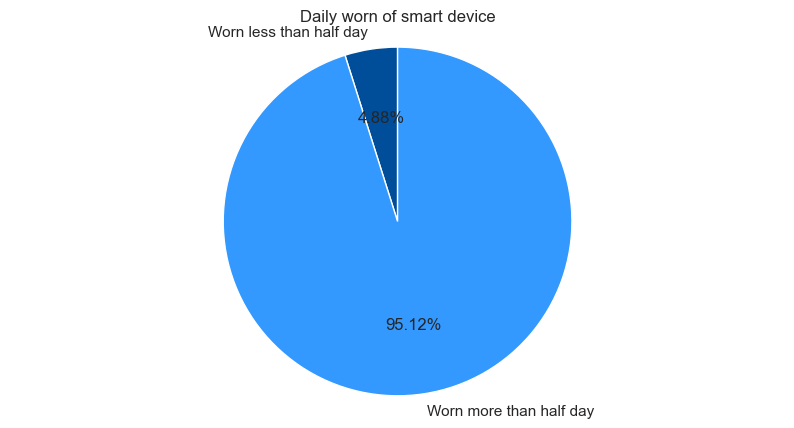

In [30]:


# Set up the data for the plot
usage_labels = ["Worn less than half day", "Worn more than half day"]
usage_colors = ["#004d99", "#3399ff"]

# Create the pie chart
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.pie(daily_worn_type['percent'], labels=usage_labels, colors=usage_colors, autopct='%0.2f%%', startangle=90)

# Add a title and remove unnecessary elements
plt.title("Daily worn of smart device")
ax.axis('equal')

# Display the plot
plt.show()

We can see that 95.12% more than half day long and just nearly 5% less than half day. No user wears the device all day long.

### Let's look at the relationship between Total Minutes Asleep and Sedentry Minutes.

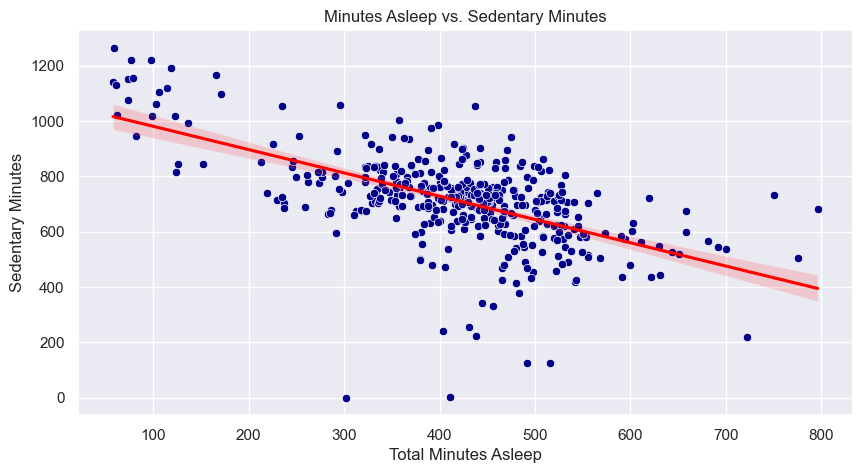

In [40]:
fig, axs = plt.subplots(figsize=FIG_SIZE)

sns.scatterplot(data=daily_activity_sleep_use, x='TotalMinutesAsleep', y='SedentaryMinutes', color='darkblue')
sns.regplot(data=daily_activity_sleep_use, x='TotalMinutesAsleep', y='SedentaryMinutes', scatter=False, color='red')

plt.title("Minutes Asleep vs. Sedentary Minutes")
plt.xlabel("Total Minutes Asleep")
plt.ylabel("Sedentary Minutes")

plt.show()


* Here we can clearly see the negative relationship between Sedentary Minutes and Sleep time.

* As an idea: **if Bellabeat users want to improve their sleep, Bellabeat app can recommend reducing sedentary time.**

* Keep in mind that we need to support this insights with more data, because correlation between some data doesn’t mean causation.

# 5. Conclusion (Act Phase) 

The objective of Bellabeat is to empower women by providing them with data to help them discover themselves.

Based on our findings, I would recommend that we leverage our own monitoring data for additional research in order to respond to our business job and assist Bellabeat with their purpose. 
Because we didn't have any demographic information about users, the datasets we utilized had a tiny sample size and may be biased. Knowing that our primary demographic is young and adult women, I would advise you to continue looking for trends in order to develop a marketing strategy centered on them. 

That being said, following our investigation, we discovered some tendencies that may benefit our online marketing and enhance the **Bellabeat app**:


**Bellabeat App Concepts**

1. According to CDC study, the average total number of steps taken per day is 8515, which is somewhat higher than what is required for health benefits. They discovered that walking 8,000 steps per day was linked to a 51% decreased risk of all-cause mortality (death from any cause). Taking 12,000 steps per day was linked to a 65% reduced risk than taking 4,000 steps. Bellabeat can persuade them to take at least 8 000 by discussing the health advantages.

2. If individuals desire to reduce weight, they should certainly limit their daily calorie intake. Bellabeat may recommend some low-calorie lunch and supper options.

3. Bellabeat should explore employing app notifications if customers wish to enhance their sleep.

4. The majority of activity occurs between 5 and 7 p.m. - I assume people go to the gym or for a stroll after work. This time can be used by Bellabeat to remind and inspire users to go for a run or stroll.

5. As an example, if users desire to enhance their sleep, the Bellabeat app might suggest that they reduce their idle time.

6. Based on our data, we discovered that 95% of users utilize their gadget on a regular basis, with just about 5% wearing the device for less than half of the day. We may continue to market the features of Bellabeat's products to urge customers to have the devices on hand at all days. 
* Long-lasting water-resistant batteries
* Products that are fashionable or elegant
* You may wear the items to any event without having to worry about the battery.


        
